In [1]:
%pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.9 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512552 sha256=ca8370530422983aca4a99758e2c9abab414f3f302ca77bd45941c98b0fd088a
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [2]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [4]:
# using a real dataset
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
import pandas as pd
import seaborn as sns
import time

iris = load_iris()
data = load_iris()

In [5]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
# normalization of the features (classical ML stuff)
features = MinMaxScaler().fit_transform(iris.data)

# What does the data even look like?
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )


In [7]:
print(features)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [8]:
def enhanced_feature_map(data_point, data_point2):
  n_qubits = num_attributes = len(data_point)
  qr = QuantumRegister(n_qubits)
  cr = ClassicalRegister(n_qubits)
  qc = QuantumCircuit(qr, cr)

  #constructing U(x)
  for i in range(n_qubits):
    qc.h(qr[i])
    qc.rz(2 * data_point[i], qr[i])
    qc.ry(2 * data_point[i], qr[i])

  qc.barrier()

  for i in range(n_qubits - 1):
    qc.cx(qr[i], qr[i + 1])

  qc.barrier()

  for i in range(n_qubits):
    qc.rz(2 * data_point[i], qr[i])

  qc.barrier()

  #constructing U-dagger(X-prime)
  for i in range(n_qubits):
    qc.rz(-2 * data_point2[i], qr[i])

  qc.barrier()

  for i in range(n_qubits - 1):
    qc.cx(qr[n_qubits - 2 - i], qr[n_qubits - 1 - i])

  qc.barrier()
  for i in range(n_qubits):
    qc.ry(-2 * data_point2[i], qr[i])
    qc.rz(-2 * data_point2[i], qr[i])
    qc.h(qr[i])
    qc.measure(qr[i], cr[i])

  qc.barrier()

  return qc

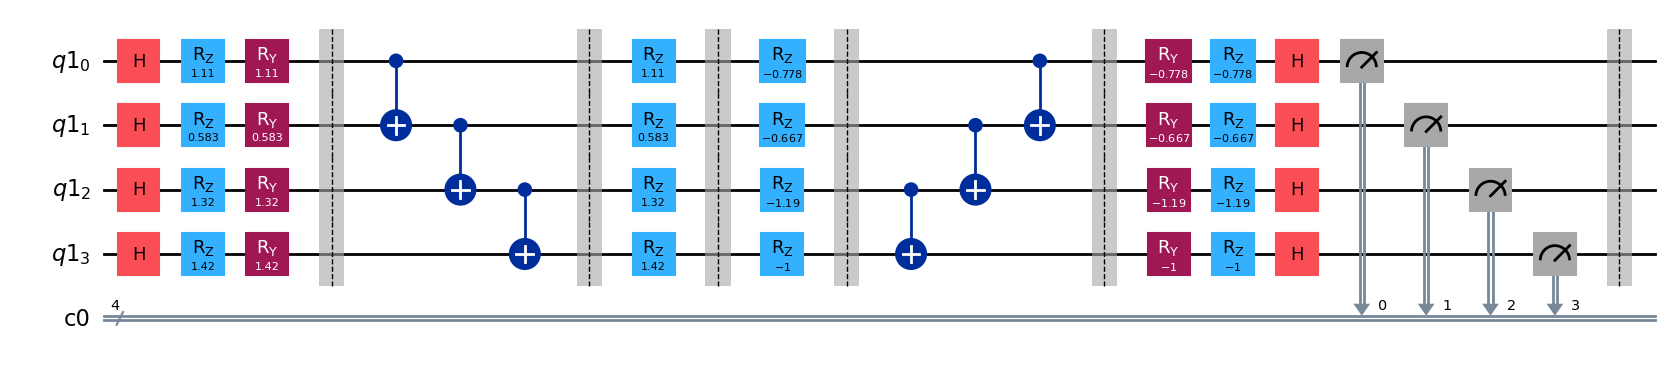

In [9]:
data_point = features[123]
data_point2 = features[55]
qc = enhanced_feature_map(data_point, data_point2)
qc.draw('mpl')

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc)
job.result().get_counts()

{'1101': 4,
 '0100': 6,
 '1010': 1,
 '1011': 4,
 '1110': 11,
 '1001': 10,
 '1100': 3,
 '1000': 33,
 '0000': 817,
 '1111': 18,
 '0001': 117}

In [11]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species
print(iris)

# print 123'rd element
print(iris.iloc[123])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0 

In [12]:
def feature_map(data_point):
  # encode a NEW circuit for a given datapoint.
  n_qubits = len(data_point)
  qr = QuantumRegister(n_qubits)
  cr = ClassicalRegister(n_qubits)
  qc = QuantumCircuit(qr, cr)

  for i in range(n_qubits):
    qc.h(qr[i])

  qc.barrier()

  for i in range(n_qubits):
    # set the rotation angle based on this current data.
    constant = 2 * data_point[i]
    qc.rx(constant * np.pi, qr[i])

  qc.barrier()

  for i in range(n_qubits - 1):
    qc.cx(qr[i], qr[i + 1])

  qc.draw('mpl')

  return qc

In [13]:
def test_set(curr_set, data_point):
  pr = []
  for i, r in curr_set.iterrows():
    backend = Aer.get_backend('statevector_simulator')
    qc = enhanced_feature_map(data_point, features[i])
    job = backend.run(qc)
    result = job.result()
    statevector = result.get_statevector()
    pr.append(np.abs(statevector[0])**2)

  # return mean of pr
  return np.mean(pr)

In [14]:
def get_accuracies(setosa, versicolor, virginica):
    # Define the correct ranges
    setosa_correct = set(range(20, 50))  # Correct range for setosa
    versicolor_correct = set(range(70, 100))  # Correct range for versicolor
    virginica_correct = set(range(130, 150))  # Correct for virginica

    setosa_actual = set(setosa)
    versicolor_actual = set(versicolor)
    virginica_actual = set(virginica)

    # Count missing points (those that should be in the set but are not)
    setosa_missing = len(setosa_correct - setosa_actual)
    versicolor_missing = len(versicolor_correct - versicolor_actual)
    virginica_missing = len(virginica_correct - virginica_actual)

    # Total classification errors
    total_errors =  setosa_missing + versicolor_missing + virginica_missing

    # Print detailed results
    print(f"Total classification errors: {total_errors}")
    final_correct = (90 - total_errors) / 90 * 100
    print(f"Classification Overall: {final_correct}%")
    return final_correct


In [15]:
def custom_tester():
  trained_setosa = []
  trained_versicolor = []
  trained_virginica = []

  setosa_set = iris[0:19] # setosa
  versicolor_set = iris[50:69] # versicolor
  virginica_set = iris[100:119] # virginica
  set_len = 3
  test_len = 30
  train_len = 20

  for i in range(set_len):
    for j in range(test_len):
      point = i * 50 + 20 + j
      data_point = features[point]
      pr_setosa = test_set(setosa_set, data_point)
      pr_versicolor = test_set(versicolor_set, data_point)
      pr_virginica = test_set(virginica_set, data_point)
      print(f"probabilities for point {point} are {pr_setosa}, {pr_versicolor} and {pr_virginica}")

      # choose the maximum between all 3
      max_pr = max(pr_setosa, pr_versicolor, pr_virginica)
      if max_pr == pr_setosa:
        trained_setosa.append(point)
      elif max_pr == pr_versicolor:
        trained_versicolor.append(point)
      else:
        trained_virginica.append(point)

  print(f"trained setosa: {trained_setosa}")
  print(f"trained versicolor: {trained_versicolor}")
  print(f"trained virginica: {trained_virginica}")

  get_accuracies(trained_setosa, trained_versicolor, trained_virginica)


In [16]:
custom_tester()

probabilities for point 20 are 0.8947368421052632, 0.21052631578947373 and 0.052631578947368446
probabilities for point 21 are 0.8421052631578947, 0.0 and 0.15789473684210525
probabilities for point 22 are 0.8421052631578947, 0.05263157894736842 and 0.0
probabilities for point 23 are 0.7894736842105263, 0.15789473684210525 and 0.05263157894736841
probabilities for point 24 are 0.8947368421052634, 0.3157894736842105 and 0.0
probabilities for point 25 are 0.8421052631578947, 0.10526315789473684 and 0.15789473684210525
probabilities for point 26 are 0.9473684210526315, 0.2631578947368421 and 0.1578947368421053
probabilities for point 27 are 0.9473684210526315, 0.3157894736842105 and 0.05263157894736842
probabilities for point 28 are 0.8421052631578947, 0.21052631578947367 and 0.10526315789473684
probabilities for point 29 are 0.8421052631578947, 0.15789473684210523 and 0.15789473684210525
probabilities for point 30 are 0.736842105263158, 0.26315789473684215 and 0.0
probabilities for point

In [24]:
# a classical test!
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # get accurary
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Kernel: {kernel}, Accuracy: {accuracy} %")

Kernel: linear, Accuracy: 94.16666666666667 %
Kernel: poly, Accuracy: 95.83333333333334 %
Kernel: rbf, Accuracy: 80.83333333333333 %
